In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
df = pd.read_csv("data/train.csv")
df

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,697,705,Asus,Chromebook Flip,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,669.00
1,435,442,Asus,Rog Strix,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1600 3.2GHz,8GB,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2kg,1695.00
2,735,743,Lenovo,V310-15IKB (i7-7500U/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,1.85kg,779.00
3,864,875,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16GB,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29kg,2240.00
4,1176,1194,Lenovo,B51-80 (i7-6500U/4GB/1008GB/FHD/W7),Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,825.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,920,934,Dell,Vostro 3568,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18kg,684.99
908,298,303,Lenovo,IdeaPad 310-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6GB,1TB HDD,AMD Radeon R5 430,Windows 10,2.4kg,499.00
909,919,933,MSI,GL62M 7RD,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,1119.91
910,717,725,Lenovo,110-15ACL (A6-7310/4GB/500GB/W10),Notebook,15.6,1366x768,AMD A6-Series 7310 2GHz,4GB,500GB HDD,AMD Radeon R4,Windows 10,2.19kg,298.00


In [3]:
df_1=pd.read_csv("data/test.csv")
df_1

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,824,833,Lenovo,ThinkPad X1,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13kg
1,101,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg
2,1157,1175,Lenovo,ThinkPad T460s,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,512GB SSD,Intel HD Graphics 520,Windows 7,1.4kg
3,940,954,HP,Omen 17-W006na,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,2.75kg
4,853,864,Lenovo,ThinkPad T470p,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GT 940MX,Windows 10,1.96kg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,292,297,HP,17-BS037cl (i3-6006U/8GB/1TB/W10),Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,8GB,1TB HDD,Intel HD Graphics 520,Windows 10,2.54kg
387,688,696,HP,17-Y002nv (A10-9600P/6GB/2TB/Radeon,Notebook,17.3,IPS Panel Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6GB,2TB HDD,AMD Radeon R7 M440,Windows 10,2.65kg
388,910,923,Dell,Latitude 5480,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7440HQ 2.8GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.6kg
389,54,55,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.4kg


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                391 non-null    int64  
 1   laptop_ID         391 non-null    int64  
 2   Company           391 non-null    object 
 3   Product           391 non-null    object 
 4   TypeName          391 non-null    object 
 5   Inches            391 non-null    float64
 6   ScreenResolution  391 non-null    object 
 7   Cpu               391 non-null    object 
 8   Ram               391 non-null    object 
 9   Memory            391 non-null    object 
 10  Gpu               391 non-null    object 
 11  OpSys             391 non-null    object 
 12  Weight            391 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 39.8+ KB


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [6]:
df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.00000
mean,652.099781,661.273026,15.060746,1126.92034
std,375.428905,380.297415,1.412363,696.08887
min,0.000000,1.000000,10.100000,174.00000
25%,332.500000,338.500000,14.000000,589.00000
50%,655.500000,663.500000,15.600000,952.00000
75%,980.500000,994.500000,15.600000,1499.00000
max,1301.000000,1319.000000,18.400000,4899.00000


Feature engineering

In [7]:
# Apply label encoding
label_encoder = LabelEncoder()
df_1['Product_encoded'] = label_encoder.fit_transform(df_1['Product'])
print(df_1)

       id  laptop_ID Company                                Product  \
0     824        833  Lenovo                            ThinkPad X1   
1     101        104      HP  15-bw000nv (E2-9000e/4GB/500GB/Radeon   
2    1157       1175  Lenovo                         ThinkPad T460s   
3     940        954      HP                         Omen 17-W006na   
4     853        864  Lenovo                         ThinkPad T470p   
..    ...        ...     ...                                    ...   
386   292        297      HP      17-BS037cl (i3-6006U/8GB/1TB/W10)   
387   688        696      HP    17-Y002nv (A10-9600P/6GB/2TB/Radeon   
388   910        923    Dell                          Latitude 5480   
389    54         55    Acer                               Aspire 3   
390  1167       1185  Lenovo    320-15ISK (i3-6006U/4GB/1TB/GeForce   

      TypeName  Inches             ScreenResolution  \
0    Ultrabook    14.0  IPS Panel Full HD 1920x1080   
1     Notebook    15.6            Ful

In [8]:
# Apply label encoding
label_encoder = LabelEncoder()
df_1['Gpu_encoded'] = label_encoder.fit_transform(df_1['Gpu'])
print(df_1)

       id  laptop_ID Company                                Product  \
0     824        833  Lenovo                            ThinkPad X1   
1     101        104      HP  15-bw000nv (E2-9000e/4GB/500GB/Radeon   
2    1157       1175  Lenovo                         ThinkPad T460s   
3     940        954      HP                         Omen 17-W006na   
4     853        864  Lenovo                         ThinkPad T470p   
..    ...        ...     ...                                    ...   
386   292        297      HP      17-BS037cl (i3-6006U/8GB/1TB/W10)   
387   688        696      HP    17-Y002nv (A10-9600P/6GB/2TB/Radeon   
388   910        923    Dell                          Latitude 5480   
389    54         55    Acer                               Aspire 3   
390  1167       1185  Lenovo    320-15ISK (i3-6006U/4GB/1TB/GeForce   

      TypeName  Inches             ScreenResolution  \
0    Ultrabook    14.0  IPS Panel Full HD 1920x1080   
1     Notebook    15.6            Ful

In [9]:
# Apply label encoding
label_encoder = LabelEncoder()
df_1['TypeName_encoded'] = label_encoder.fit_transform(df_1['TypeName'])
print(df_1)

       id  laptop_ID Company                                Product  \
0     824        833  Lenovo                            ThinkPad X1   
1     101        104      HP  15-bw000nv (E2-9000e/4GB/500GB/Radeon   
2    1157       1175  Lenovo                         ThinkPad T460s   
3     940        954      HP                         Omen 17-W006na   
4     853        864  Lenovo                         ThinkPad T470p   
..    ...        ...     ...                                    ...   
386   292        297      HP      17-BS037cl (i3-6006U/8GB/1TB/W10)   
387   688        696      HP    17-Y002nv (A10-9600P/6GB/2TB/Radeon   
388   910        923    Dell                          Latitude 5480   
389    54         55    Acer                               Aspire 3   
390  1167       1185  Lenovo    320-15ISK (i3-6006U/4GB/1TB/GeForce   

      TypeName  Inches             ScreenResolution  \
0    Ultrabook    14.0  IPS Panel Full HD 1920x1080   
1     Notebook    15.6            Ful

In [10]:
# Apply label encoding
label_encoder = LabelEncoder()
df_1['Memory_encoded'] = label_encoder.fit_transform(df_1['Memory'])
print(df_1)

       id  laptop_ID Company                                Product  \
0     824        833  Lenovo                            ThinkPad X1   
1     101        104      HP  15-bw000nv (E2-9000e/4GB/500GB/Radeon   
2    1157       1175  Lenovo                         ThinkPad T460s   
3     940        954      HP                         Omen 17-W006na   
4     853        864  Lenovo                         ThinkPad T470p   
..    ...        ...     ...                                    ...   
386   292        297      HP      17-BS037cl (i3-6006U/8GB/1TB/W10)   
387   688        696      HP    17-Y002nv (A10-9600P/6GB/2TB/Radeon   
388   910        923    Dell                          Latitude 5480   
389    54         55    Acer                               Aspire 3   
390  1167       1185  Lenovo    320-15ISK (i3-6006U/4GB/1TB/GeForce   

      TypeName  Inches             ScreenResolution  \
0    Ultrabook    14.0  IPS Panel Full HD 1920x1080   
1     Notebook    15.6            Ful

In [11]:
# Apply label encoding
label_encoder = LabelEncoder()
df_1['Cpu_encoded'] = label_encoder.fit_transform(df_1['Cpu'])
print(df_1)

       id  laptop_ID Company                                Product  \
0     824        833  Lenovo                            ThinkPad X1   
1     101        104      HP  15-bw000nv (E2-9000e/4GB/500GB/Radeon   
2    1157       1175  Lenovo                         ThinkPad T460s   
3     940        954      HP                         Omen 17-W006na   
4     853        864  Lenovo                         ThinkPad T470p   
..    ...        ...     ...                                    ...   
386   292        297      HP      17-BS037cl (i3-6006U/8GB/1TB/W10)   
387   688        696      HP    17-Y002nv (A10-9600P/6GB/2TB/Radeon   
388   910        923    Dell                          Latitude 5480   
389    54         55    Acer                               Aspire 3   
390  1167       1185  Lenovo    320-15ISK (i3-6006U/4GB/1TB/GeForce   

      TypeName  Inches             ScreenResolution  \
0    Ultrabook    14.0  IPS Panel Full HD 1920x1080   
1     Notebook    15.6            Ful

In [12]:
# Apply label encoding
label_encoder = LabelEncoder()
df_1['ScreenResolution_encoded'] = label_encoder.fit_transform(df_1['ScreenResolution'])
print(df_1)

       id  laptop_ID Company                                Product  \
0     824        833  Lenovo                            ThinkPad X1   
1     101        104      HP  15-bw000nv (E2-9000e/4GB/500GB/Radeon   
2    1157       1175  Lenovo                         ThinkPad T460s   
3     940        954      HP                         Omen 17-W006na   
4     853        864  Lenovo                         ThinkPad T470p   
..    ...        ...     ...                                    ...   
386   292        297      HP      17-BS037cl (i3-6006U/8GB/1TB/W10)   
387   688        696      HP    17-Y002nv (A10-9600P/6GB/2TB/Radeon   
388   910        923    Dell                          Latitude 5480   
389    54         55    Acer                               Aspire 3   
390  1167       1185  Lenovo    320-15ISK (i3-6006U/4GB/1TB/GeForce   

      TypeName  Inches             ScreenResolution  \
0    Ultrabook    14.0  IPS Panel Full HD 1920x1080   
1     Notebook    15.6            Ful

In [13]:
# Apply label encoding
label_encoder = LabelEncoder()
df_1['Company_encoded'] = label_encoder.fit_transform(df_1['Company'])
print(df_1)

       id  laptop_ID Company                                Product  \
0     824        833  Lenovo                            ThinkPad X1   
1     101        104      HP  15-bw000nv (E2-9000e/4GB/500GB/Radeon   
2    1157       1175  Lenovo                         ThinkPad T460s   
3     940        954      HP                         Omen 17-W006na   
4     853        864  Lenovo                         ThinkPad T470p   
..    ...        ...     ...                                    ...   
386   292        297      HP      17-BS037cl (i3-6006U/8GB/1TB/W10)   
387   688        696      HP    17-Y002nv (A10-9600P/6GB/2TB/Radeon   
388   910        923    Dell                          Latitude 5480   
389    54         55    Acer                               Aspire 3   
390  1167       1185  Lenovo    320-15ISK (i3-6006U/4GB/1TB/GeForce   

      TypeName  Inches             ScreenResolution  \
0    Ultrabook    14.0  IPS Panel Full HD 1920x1080   
1     Notebook    15.6            Ful

In [14]:
# Apply label encoding
label_encoder = LabelEncoder()
df['Product_encoded'] = label_encoder.fit_transform(df['Product'])
print(df)

       id  laptop_ID Company                                Product  \
0     697        705    Asus                        Chromebook Flip   
1     435        442    Asus                              Rog Strix   
2     735        743  Lenovo  V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)   
3     864        875    Dell                                 XPS 13   
4    1176       1194  Lenovo    B51-80 (i7-6500U/4GB/1008GB/FHD/W7)   
..    ...        ...     ...                                    ...   
907   920        934    Dell                            Vostro 3568   
908   298        303  Lenovo                      IdeaPad 310-15ABR   
909   919        933     MSI                              GL62M 7RD   
910   717        725  Lenovo      110-15ACL (A6-7310/4GB/500GB/W10)   
911   987       1001  Lenovo                     Legion Y520-15IKBN   

               TypeName  Inches                  ScreenResolution  \
0    2 in 1 Convertible    12.5   Full HD / Touchscreen 1920x1080   
1        

In [15]:
# Apply label encoding
label_encoder = LabelEncoder()
df['Gpu_encoded'] = label_encoder.fit_transform(df['Gpu'])
print(df)

       id  laptop_ID Company                                Product  \
0     697        705    Asus                        Chromebook Flip   
1     435        442    Asus                              Rog Strix   
2     735        743  Lenovo  V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)   
3     864        875    Dell                                 XPS 13   
4    1176       1194  Lenovo    B51-80 (i7-6500U/4GB/1008GB/FHD/W7)   
..    ...        ...     ...                                    ...   
907   920        934    Dell                            Vostro 3568   
908   298        303  Lenovo                      IdeaPad 310-15ABR   
909   919        933     MSI                              GL62M 7RD   
910   717        725  Lenovo      110-15ACL (A6-7310/4GB/500GB/W10)   
911   987       1001  Lenovo                     Legion Y520-15IKBN   

               TypeName  Inches                  ScreenResolution  \
0    2 in 1 Convertible    12.5   Full HD / Touchscreen 1920x1080   
1        

In [16]:
# Apply label encoding
label_encoder = LabelEncoder()
df['TypeName_encoded'] = label_encoder.fit_transform(df['TypeName'])
print(df)

       id  laptop_ID Company                                Product  \
0     697        705    Asus                        Chromebook Flip   
1     435        442    Asus                              Rog Strix   
2     735        743  Lenovo  V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)   
3     864        875    Dell                                 XPS 13   
4    1176       1194  Lenovo    B51-80 (i7-6500U/4GB/1008GB/FHD/W7)   
..    ...        ...     ...                                    ...   
907   920        934    Dell                            Vostro 3568   
908   298        303  Lenovo                      IdeaPad 310-15ABR   
909   919        933     MSI                              GL62M 7RD   
910   717        725  Lenovo      110-15ACL (A6-7310/4GB/500GB/W10)   
911   987       1001  Lenovo                     Legion Y520-15IKBN   

               TypeName  Inches                  ScreenResolution  \
0    2 in 1 Convertible    12.5   Full HD / Touchscreen 1920x1080   
1        

In [17]:
# Apply label encoding
label_encoder = LabelEncoder()
df['Memory_encoded'] = label_encoder.fit_transform(df['Memory'])
print(df)

       id  laptop_ID Company                                Product  \
0     697        705    Asus                        Chromebook Flip   
1     435        442    Asus                              Rog Strix   
2     735        743  Lenovo  V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)   
3     864        875    Dell                                 XPS 13   
4    1176       1194  Lenovo    B51-80 (i7-6500U/4GB/1008GB/FHD/W7)   
..    ...        ...     ...                                    ...   
907   920        934    Dell                            Vostro 3568   
908   298        303  Lenovo                      IdeaPad 310-15ABR   
909   919        933     MSI                              GL62M 7RD   
910   717        725  Lenovo      110-15ACL (A6-7310/4GB/500GB/W10)   
911   987       1001  Lenovo                     Legion Y520-15IKBN   

               TypeName  Inches                  ScreenResolution  \
0    2 in 1 Convertible    12.5   Full HD / Touchscreen 1920x1080   
1        

In [18]:
# Apply label encoding
label_encoder = LabelEncoder()
df['ScreenResolution_encoded'] = label_encoder.fit_transform(df['ScreenResolution'])
print(df)

       id  laptop_ID Company                                Product  \
0     697        705    Asus                        Chromebook Flip   
1     435        442    Asus                              Rog Strix   
2     735        743  Lenovo  V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)   
3     864        875    Dell                                 XPS 13   
4    1176       1194  Lenovo    B51-80 (i7-6500U/4GB/1008GB/FHD/W7)   
..    ...        ...     ...                                    ...   
907   920        934    Dell                            Vostro 3568   
908   298        303  Lenovo                      IdeaPad 310-15ABR   
909   919        933     MSI                              GL62M 7RD   
910   717        725  Lenovo      110-15ACL (A6-7310/4GB/500GB/W10)   
911   987       1001  Lenovo                     Legion Y520-15IKBN   

               TypeName  Inches                  ScreenResolution  \
0    2 in 1 Convertible    12.5   Full HD / Touchscreen 1920x1080   
1        

In [19]:
# Apply label encoding
label_encoder = LabelEncoder()
df['Cpu_encoded'] = label_encoder.fit_transform(df['Cpu'])
print(df)

       id  laptop_ID Company                                Product  \
0     697        705    Asus                        Chromebook Flip   
1     435        442    Asus                              Rog Strix   
2     735        743  Lenovo  V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)   
3     864        875    Dell                                 XPS 13   
4    1176       1194  Lenovo    B51-80 (i7-6500U/4GB/1008GB/FHD/W7)   
..    ...        ...     ...                                    ...   
907   920        934    Dell                            Vostro 3568   
908   298        303  Lenovo                      IdeaPad 310-15ABR   
909   919        933     MSI                              GL62M 7RD   
910   717        725  Lenovo      110-15ACL (A6-7310/4GB/500GB/W10)   
911   987       1001  Lenovo                     Legion Y520-15IKBN   

               TypeName  Inches                  ScreenResolution  \
0    2 in 1 Convertible    12.5   Full HD / Touchscreen 1920x1080   
1        

In [20]:
# Apply label encoding
label_encoder = LabelEncoder()
df['Company_encoded'] = label_encoder.fit_transform(df['Company'])
print(df)

       id  laptop_ID Company                                Product  \
0     697        705    Asus                        Chromebook Flip   
1     435        442    Asus                              Rog Strix   
2     735        743  Lenovo  V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)   
3     864        875    Dell                                 XPS 13   
4    1176       1194  Lenovo    B51-80 (i7-6500U/4GB/1008GB/FHD/W7)   
..    ...        ...     ...                                    ...   
907   920        934    Dell                            Vostro 3568   
908   298        303  Lenovo                      IdeaPad 310-15ABR   
909   919        933     MSI                              GL62M 7RD   
910   717        725  Lenovo      110-15ACL (A6-7310/4GB/500GB/W10)   
911   987       1001  Lenovo                     Legion Y520-15IKBN   

               TypeName  Inches                  ScreenResolution  \
0    2 in 1 Convertible    12.5   Full HD / Touchscreen 1920x1080   
1        

In [21]:
# Convert GB values to integers
df_1['Weight'] = df_1['Weight'].str.replace("kg", "").astype(float)

print(df_1)

       id  laptop_ID Company                                Product  \
0     824        833  Lenovo                            ThinkPad X1   
1     101        104      HP  15-bw000nv (E2-9000e/4GB/500GB/Radeon   
2    1157       1175  Lenovo                         ThinkPad T460s   
3     940        954      HP                         Omen 17-W006na   
4     853        864  Lenovo                         ThinkPad T470p   
..    ...        ...     ...                                    ...   
386   292        297      HP      17-BS037cl (i3-6006U/8GB/1TB/W10)   
387   688        696      HP    17-Y002nv (A10-9600P/6GB/2TB/Radeon   
388   910        923    Dell                          Latitude 5480   
389    54         55    Acer                               Aspire 3   
390  1167       1185  Lenovo    320-15ISK (i3-6006U/4GB/1TB/GeForce   

      TypeName  Inches             ScreenResolution  \
0    Ultrabook    14.0  IPS Panel Full HD 1920x1080   
1     Notebook    15.6            Ful

In [22]:
# Convert GB values to integers
df_1['Ram'] = df_1['Ram'].str.replace("GB", "").astype(int)

print(df_1)

       id  laptop_ID Company                                Product  \
0     824        833  Lenovo                            ThinkPad X1   
1     101        104      HP  15-bw000nv (E2-9000e/4GB/500GB/Radeon   
2    1157       1175  Lenovo                         ThinkPad T460s   
3     940        954      HP                         Omen 17-W006na   
4     853        864  Lenovo                         ThinkPad T470p   
..    ...        ...     ...                                    ...   
386   292        297      HP      17-BS037cl (i3-6006U/8GB/1TB/W10)   
387   688        696      HP    17-Y002nv (A10-9600P/6GB/2TB/Radeon   
388   910        923    Dell                          Latitude 5480   
389    54         55    Acer                               Aspire 3   
390  1167       1185  Lenovo    320-15ISK (i3-6006U/4GB/1TB/GeForce   

      TypeName  Inches             ScreenResolution  \
0    Ultrabook    14.0  IPS Panel Full HD 1920x1080   
1     Notebook    15.6            Ful

In [23]:
# Convert GB values to integers
df['Weight'] = df['Weight'].str.replace("kg", "").astype(float)

print(df)

       id  laptop_ID Company                                Product  \
0     697        705    Asus                        Chromebook Flip   
1     435        442    Asus                              Rog Strix   
2     735        743  Lenovo  V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)   
3     864        875    Dell                                 XPS 13   
4    1176       1194  Lenovo    B51-80 (i7-6500U/4GB/1008GB/FHD/W7)   
..    ...        ...     ...                                    ...   
907   920        934    Dell                            Vostro 3568   
908   298        303  Lenovo                      IdeaPad 310-15ABR   
909   919        933     MSI                              GL62M 7RD   
910   717        725  Lenovo      110-15ACL (A6-7310/4GB/500GB/W10)   
911   987       1001  Lenovo                     Legion Y520-15IKBN   

               TypeName  Inches                  ScreenResolution  \
0    2 in 1 Convertible    12.5   Full HD / Touchscreen 1920x1080   
1        

In [24]:
# Convert GB values to integers
df['Ram'] = df['Ram'].str.replace("GB", "").astype(int)

print(df)

       id  laptop_ID Company                                Product  \
0     697        705    Asus                        Chromebook Flip   
1     435        442    Asus                              Rog Strix   
2     735        743  Lenovo  V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)   
3     864        875    Dell                                 XPS 13   
4    1176       1194  Lenovo    B51-80 (i7-6500U/4GB/1008GB/FHD/W7)   
..    ...        ...     ...                                    ...   
907   920        934    Dell                            Vostro 3568   
908   298        303  Lenovo                      IdeaPad 310-15ABR   
909   919        933     MSI                              GL62M 7RD   
910   717        725  Lenovo      110-15ACL (A6-7310/4GB/500GB/W10)   
911   987       1001  Lenovo                     Legion Y520-15IKBN   

               TypeName  Inches                  ScreenResolution  \
0    2 in 1 Convertible    12.5   Full HD / Touchscreen 1920x1080   
1        

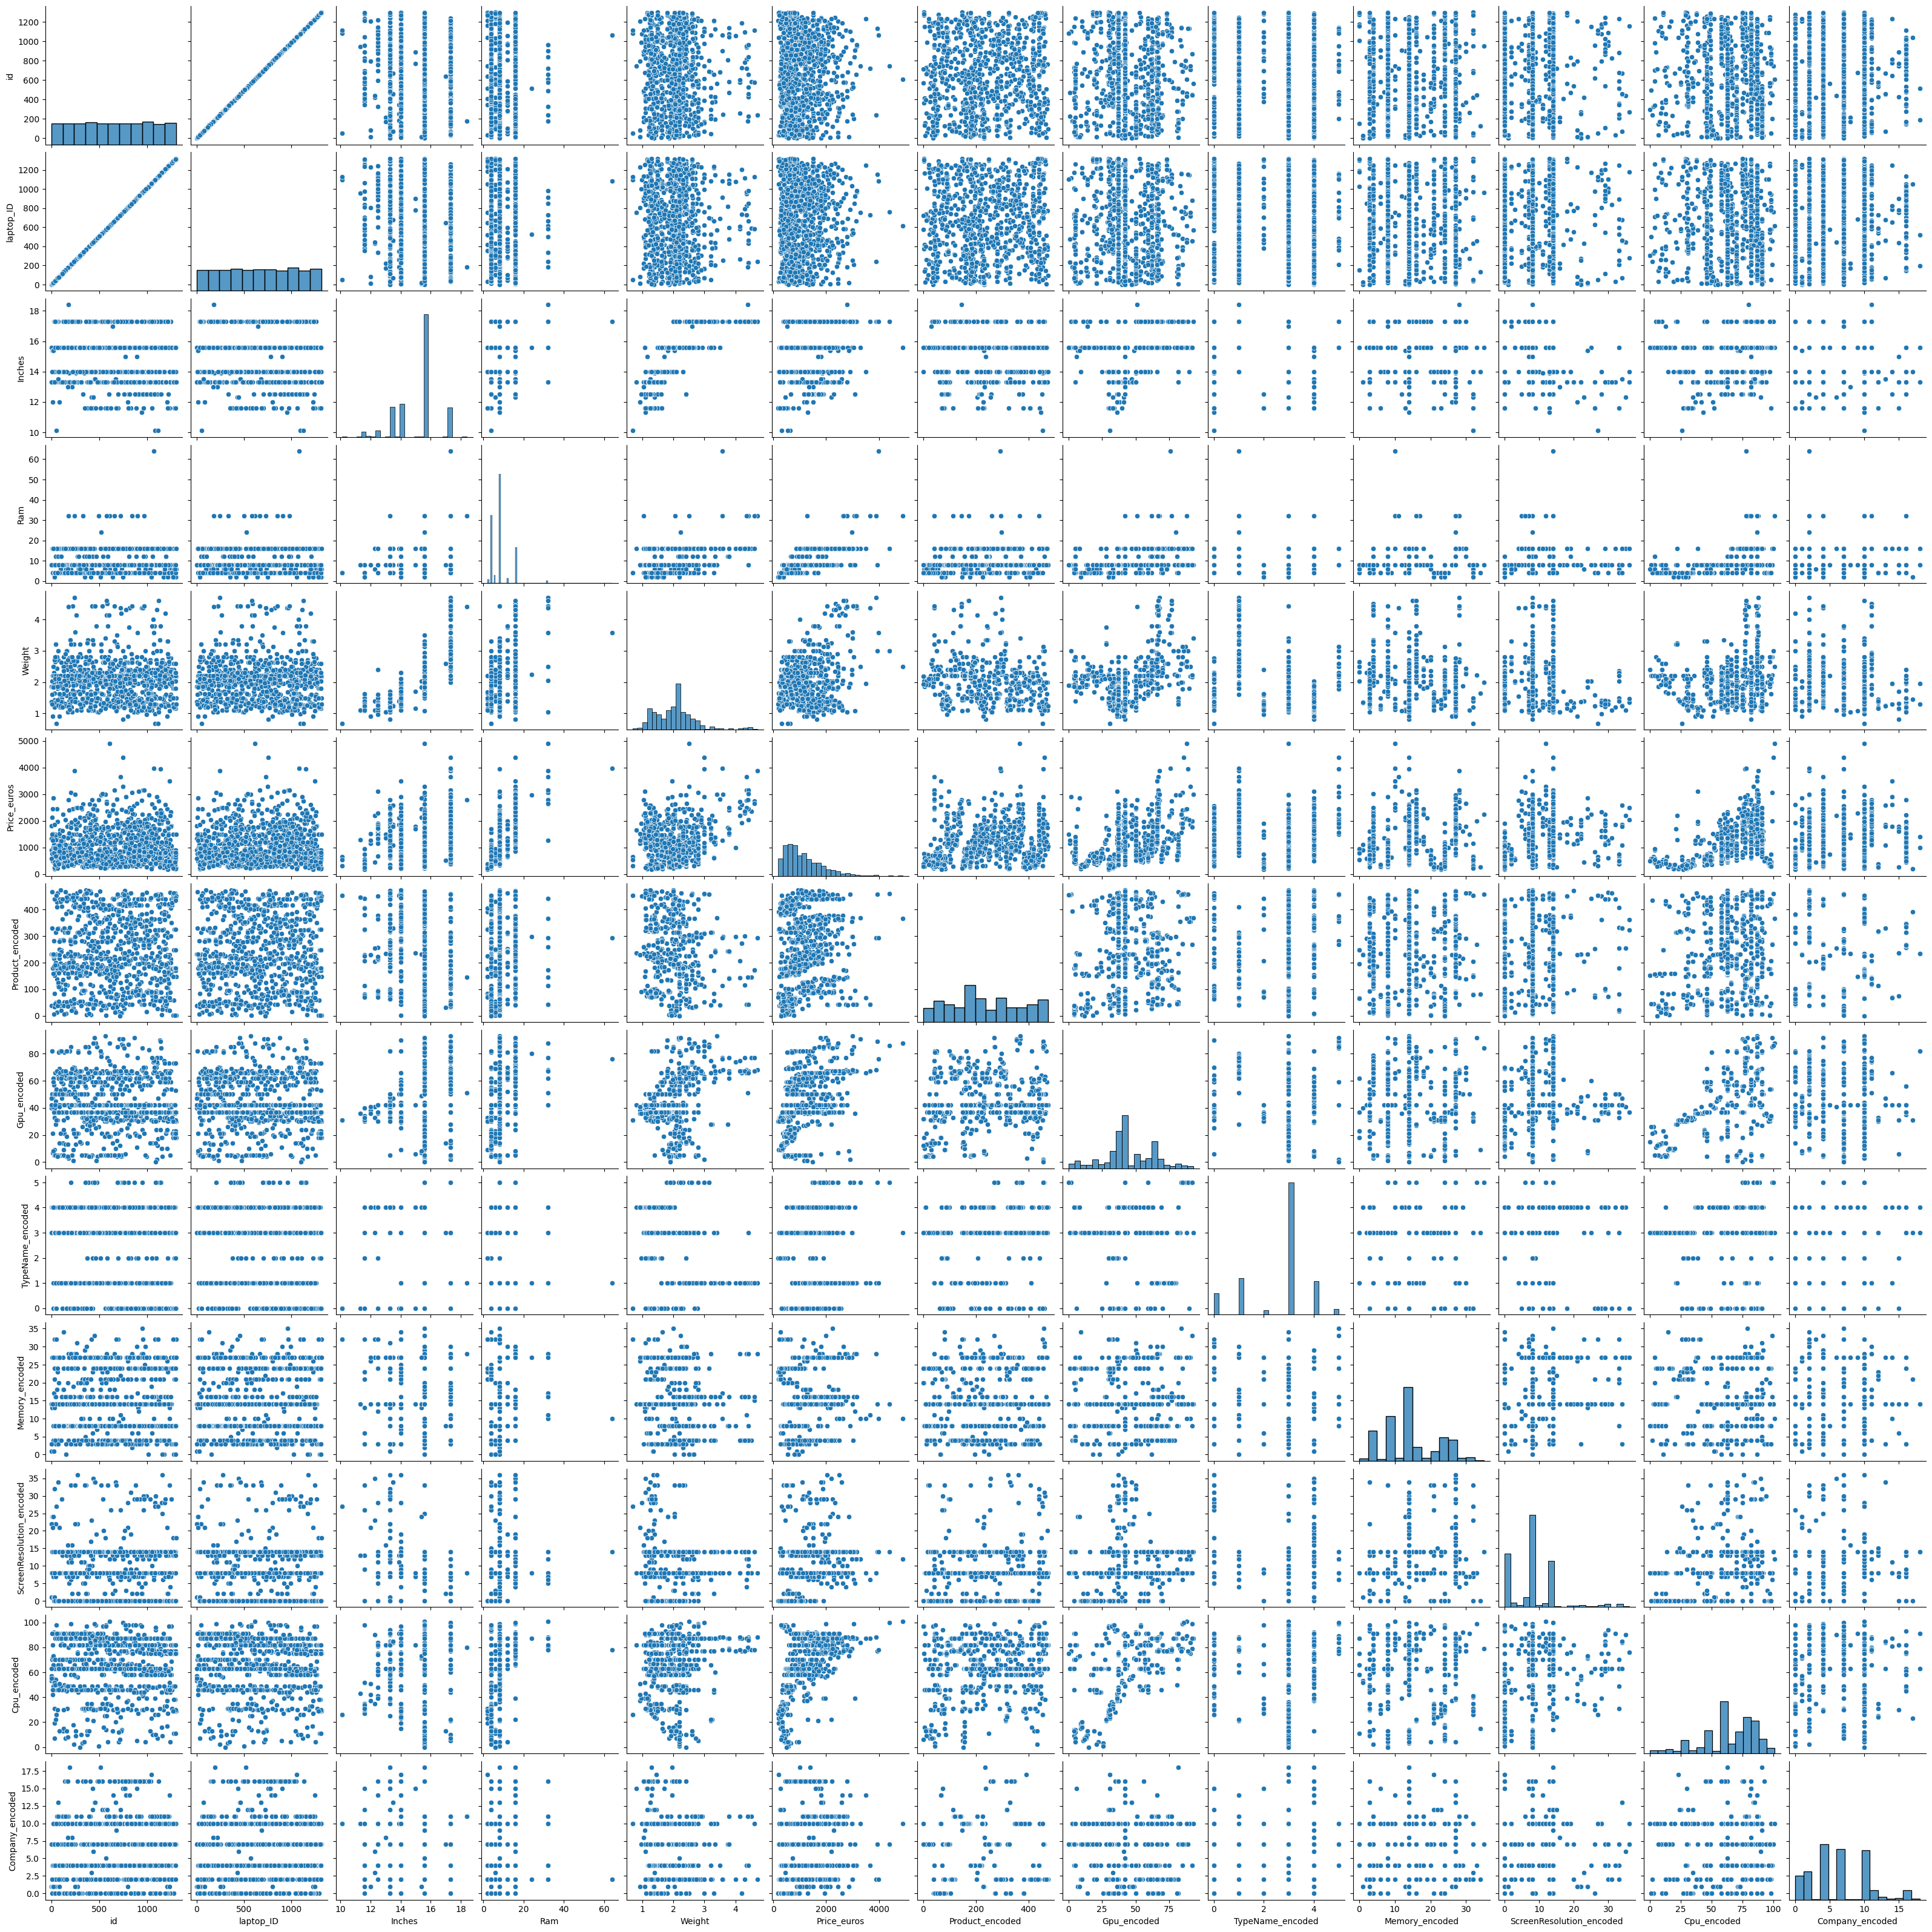

In [25]:
sns.pairplot(df)

In [45]:
X = df[["id","Inches","Ram","Company_encoded","ScreenResolution_encoded","Cpu_encoded",
        "Memory_encoded","Weight","TypeName_encoded","Gpu_encoded",
        #"Product_encoded"
        ]]
y = df[['Price_euros']]
X_1= df_1[["id","Inches","Ram","Company_encoded","ScreenResolution_encoded","Cpu_encoded",
           "Memory_encoded","Weight","TypeName_encoded","Gpu_encoded",
           #"Product_encoded"
           ]]
X_1

,id,Inches,Ram,Company_encoded,ScreenResolution_encoded,Cpu_encoded,Memory_encoded,Weight,TypeName_encoded,Gpu_encoded
0,824,14.0,8,9,14,38,12,1.13,4,35
1,101,15.6,4,7,8,8,18,2.10,3,5
2,1157,14.0,12,9,8,49,19,1.40,4,30
3,940,17.3,8,7,14,35,4,2.75,1,61
4,853,14.0,8,9,14,55,13,1.96,4,48
...,...,...,...,...,...,...,...,...,...,...
386,292,17.3,8,7,2,29,9,2.54,3,30
387,688,17.3,6,7,14,0,16,2.65,3,15
388,910,14.0,8,4,8,41,13,1.60,3,35
389,54,15.6,4,0,0,31,9,2.40,3,35


<Axes: >

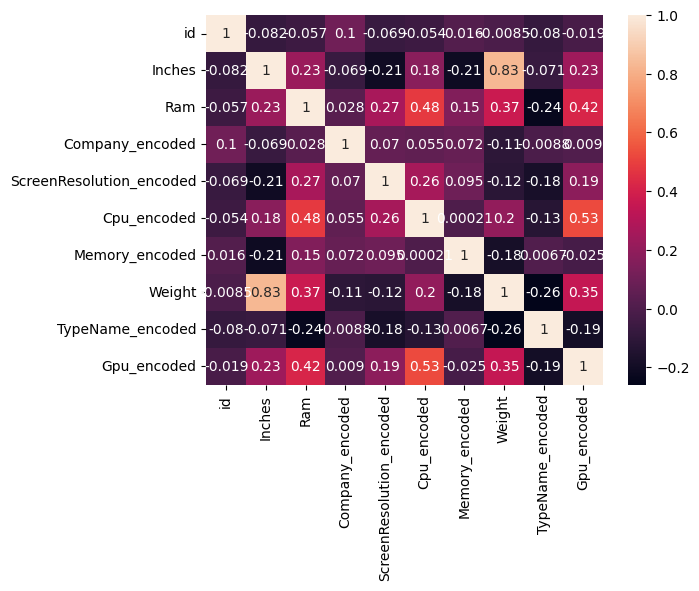

In [46]:
sns.heatmap(X.corr(), annot=True)

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [48]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test =train_test_split(X,
                                                                    y,
                                                                    test_size=validation_size,
                                                                    random_state=seed)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(729, 10)
(183, 10)
(729, 1)
(183, 1)


RANDOM FOREST

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rnd_reg = RandomForestRegressor(max_leaf_nodes=50,
                      n_estimators=100, random_state=42
                                 )
rnd_reg.fit(X_train, Y_train)

y_pred = rnd_reg.predict(X_test)
print(mean_absolute_error(Y_test, y_pred))
print(np.mean(Y_test))

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


198.5636198381311
1011.6265027322404


GRIDSEARCHCV

In [32]:
parameters = {
    "n_estimators": [60,80,100],
    "max_depth": [3,4,5],
    "max_features": [3,4,5],
    "max_leaf_nodes": [30,40,50]
}

In [33]:
rfc_gs = GridSearchCV(RandomForestRegressor(random_state=seed), parameters, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

rfc_gs.fit(X_train, Y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=7), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [3, 4, 5],
                         'max_leaf_nodes': [30, 40, 50],
                         'n_estimators': [60, 80, 100]},
             scoring='accuracy', verbose=2)

In [34]:
print(rfc_gs.best_estimator_)
print(rfc_gs.best_score_)
print(rfc_gs.best_params_)
y_pred1 = rfc_gs.predict(X_test)
print(mean_absolute_error(Y_test, y_pred1))

RandomForestRegressor(max_depth=3, max_features=3, max_leaf_nodes=30,
                      n_estimators=60, random_state=7)
nan
{'max_depth': 3, 'max_features': 3, 'max_leaf_nodes': 30, 'n_estimators': 60}
261.2390220227027


GRADIENTBOOSTING REGRESSOR

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2,
                                 n_estimators=100,
                                 learning_rate=1.0,
                                 random_state=42)
gbrt.fit(X_train, Y_train)


y_pred_gbrt = gbrt.predict(X_test)
mean_absolute_error(Y_test, y_pred_gbrt)

c:\Users\aprai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


222.45593439978813

In [36]:
y_pred_X_1=rnd_reg.predict(X_1)
y_pred_X_1

array([2011.16042948,  380.80927403, 1747.79322608,  995.41144674,
       1488.62139203, 2374.8432388 ,  377.00580111,  914.80712985,
       1948.98126016, 1416.99560173,  487.47671568, 1527.22462457,
        386.16661638, 1817.75793855, 1789.2454439 , 1612.49785756,
        436.96331667,  406.65956995,  380.14379793,  436.96331667,
       1607.45842888, 1165.35107787,  378.62790272,  377.00580111,
        377.00580111, 1724.23193996, 1787.79527044,  821.40930691,
       1054.49977076, 1439.9058423 ,  861.34077616,  378.69468295,
       1356.01014825, 1541.28340988, 1808.75139497,  380.14379793,
       2077.83061069,  377.00580111,  487.19450794,  377.00580111,
       1493.15159475, 1325.75992383, 2063.29127744, 1789.97082058,
        809.0402057 , 1408.04272903,  378.69468295,  966.64210226,
       1458.94592865,  671.87005691, 1674.64831108, 1753.06755786,
       1411.97847882,  894.41226903, 1654.3843481 ,  985.40920788,
       1441.29247924,  848.69423409,  866.95288664,  447.13562

In [41]:
# Suponiendo que df ya existe y contiene una columna "id"
# Y que y_pred_X_1 es una lista o un array con predicciones

dff= pd.DataFrame({'id': df_1["id"], 'Price_euros': y_pred_X_1})

print(dff)

       id  Price_euros
0     824  2011.160429
1     101   380.809274
2    1157  1747.793226
3     940   995.411447
4     853  1488.621392
..    ...          ...
386   292   572.589820
387   688   388.995898
388   910  1230.981113
389    54   380.143798
390  1167   380.143798

[391 rows x 2 columns]


In [38]:
# Guardar DataFrame a CSV
dff.to_csv("archivo10.csv",index=False)